In [3]:
#import necessary Python libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

In [21]:
#read the dataset
data = pd.read_csv('Tesla_Latest_Stock_Data.csv')
data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2840,2021-10-08,796.210022,796.380005,780.909973,785.489990,16711100,0,0.0
2841,2021-10-11,787.650024,801.239990,785.500000,791.940002,14200300,0,0.0
2842,2021-10-12,800.929993,812.320007,796.570007,805.719971,22020000,0,0.0
2843,2021-10-13,810.469971,815.409973,805.780029,811.080017,14120100,0,0.0
2844,2021-10-14,815.489990,820.250000,813.349976,818.320007,12203200,0,0.0


In [16]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [6]:
#check for null values
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [9]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2845.000000,2845.000000,2845.000000,2845.000000,2.845000e+03,2845.0,2845.000000
mean,105.797199,107.959321,103.485805,105.853488,3.145634e+07,0.0,0.001757
std,188.691743,192.434544,184.592519,188.788993,2.845125e+07,0.0,0.093741
min,3.228000,3.326000,2.996000,3.160000,5.925000e+05,0.0,0.000000
25%,10.352000,10.748000,10.132000,10.400000,1.252200e+07,0.0,0.000000
50%,45.868000,46.493999,45.099998,45.902000,2.482100e+07,0.0,0.000000
75%,65.000000,66.251999,63.993999,65.234001,4.014650e+07,0.0,0.000000
max,891.380005,900.400024,871.599976,883.090027,3.046940e+08,0.0,5.000000


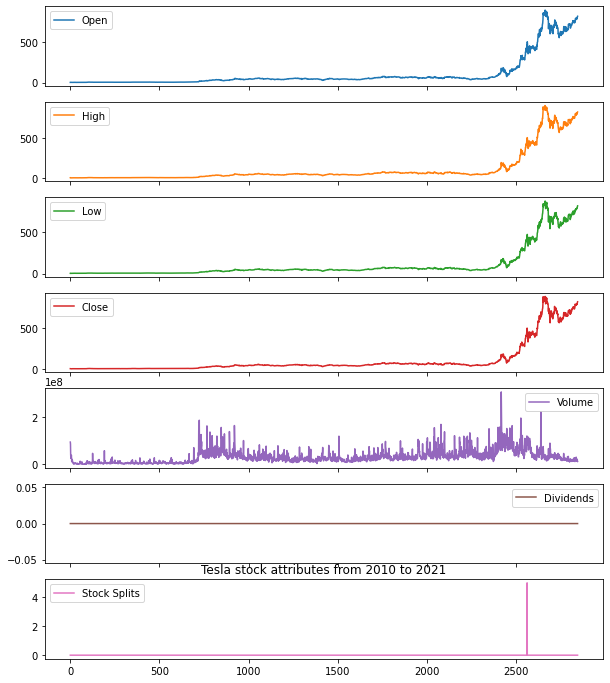

In [35]:
#data visulization
data.plot(subplots=True, figsize=(10,12))
plt.title('Tesla stock attributes from 2010 to 2021')
plt.savefig('stocks.png')
plt.show()

Text(0.5, 0, 'Date')

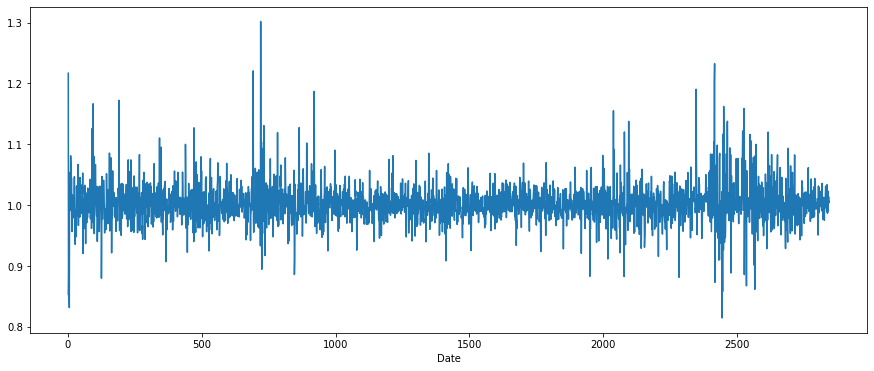

In [9]:
#to measure percentage change in stocks
data['Change'] = data.High.div(data.High.shift())
data['Change'].plot(figsize=(15,6))
plt.xlabel("Date")

Text(0.5, 0, 'Date')

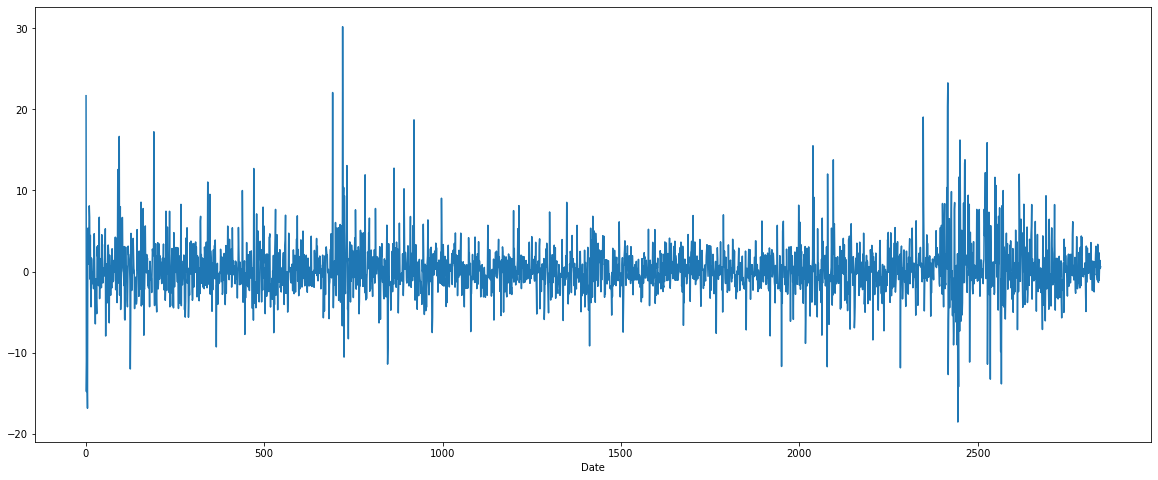

In [10]:
# to find the stock returns
data['Return'] = data.Change.sub(1).mul(100)
data['Return'].plot(figsize=(20,8))
plt.xlabel("Date")

In [12]:
%matplotlib inline
from pylab import rcParams
from chart_studio import plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm

KeyError: '10-2021'

In [32]:
# OHLC chart from 2010 to 2021
trace = go.Ohlc(x=data.index,
                open=data.Open,
                high=data.High,
                low=data.Low,
                close=data.Close)
df = [trace]

iplot(df, filename='simple_ohlc')


In [31]:
Date = pd.to_datetime(data.Date)
data.Date.plot(subplots=True, figsize=(10,12))
x = [datetime.strptime(d, "%m/%d/%Y").data.Date() for d in dates]
plt.title('Tesla stock attributes from 2010 to 2021')
plt.savefig('stocks.png')
plt.show()



TypeError: no numeric data to plot

In [26]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
       precip_june_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.show()

0       2010-06-29
1       2010-06-30
2       2010-07-01
3       2010-07-02
4       2010-07-06
           ...    
2840    2021-10-08
2841    2021-10-11
2842    2021-10-12
2843    2021-10-13
2844    2021-10-14
Name: Date, Length: 2845, dtype: object